Kelompok HexaMind

Nama Anggota:
1. Sabrina Shafwa (2106632756)
2. Salsabila H. Sastro (2106722726)
3. M. Irfansyah (2106701255)
4. Muhammad Varendra Ramadhan (2206052673)
5. Prayoga Permana (2206030621)

Tujuan : Memprediksi Captcha

Pendekatan : melatih model CNN untuk setiap huruf yang muncul dalam CAPTCHA dan menggunakan model tersebut untuk evaluasi. Di sini kami akan memproses data image dengan menghilangkan semua noise termasuk merapikan gambar dan menghapus garis-garis yang ada, lalu memisahkan kelima huruf dalam gambar. Setiap huruf akan dimasukkan ke dalam model secara terpisah untuk dievaluasi.

#### Image Processing

In [ ]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fournierp/captcha-version-2-images")

print("Path to dataset files:", path)

100%|██████████| 17.4M/17.4M [00:00<00:00, 44.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2


In [ ]:
print(os.listdir(path))

['samples']


In [ ]:
path1 = '/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/23n88.png'
path2 = '/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/23mdg.png'

In [ ]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')

    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')

    plt.axis('off')

In [ ]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

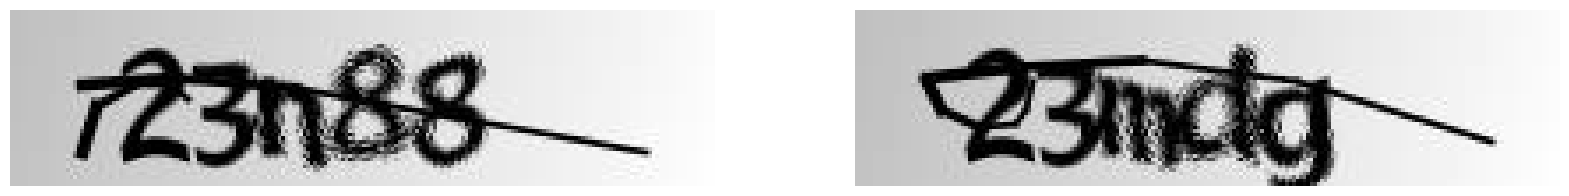

In [ ]:
plot_(img1, img2)

In [ ]:
#membaca gambar dalam mode grayscale (hitam-putih)
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

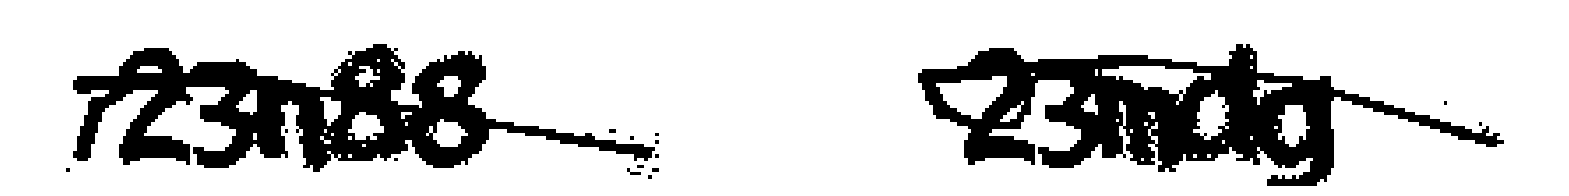

In [ ]:
plot_(thresh_img1, thresh_img2)

In [ ]:
#Morphological closing untuk menutup celah kecil atau menghilangkan noise pada gambar
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

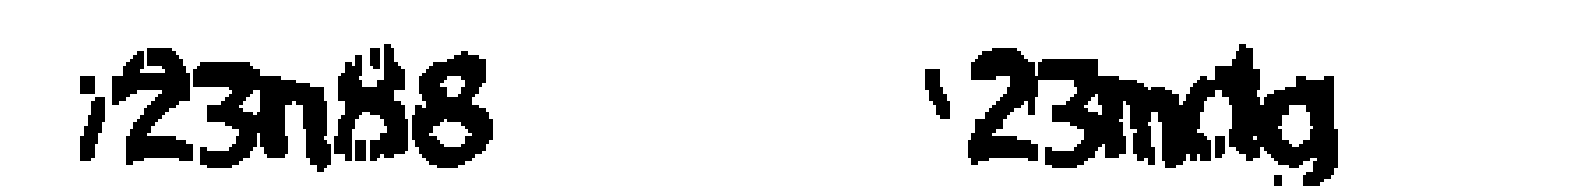

In [ ]:
plot_(close_img1, close_img2)

Dilation adalah proses di mana area putih pada gambar diperluas. Sebuah kernel (filter kecil) digeser di seluruh gambar, dan setiap titik pusat kernel diperbarui dengan nilai pixel tertinggi di sekitarnya. Hasilnya, area putih (objek) dalam gambar akan membesar.

In [ ]:

dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

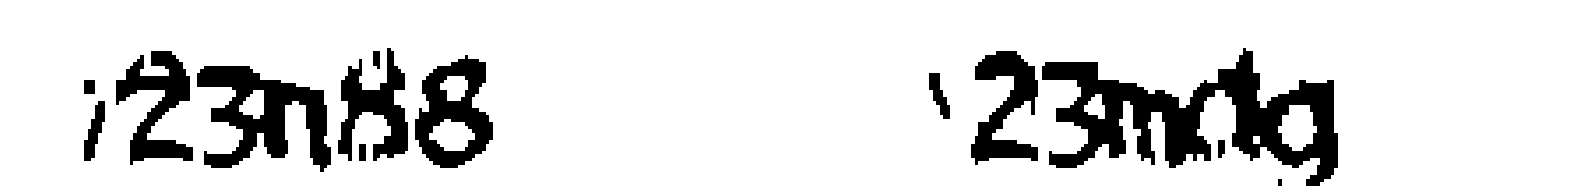

In [ ]:
plot_(dilate_img1, dilate_img2)

In [ ]:
#Blurring
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

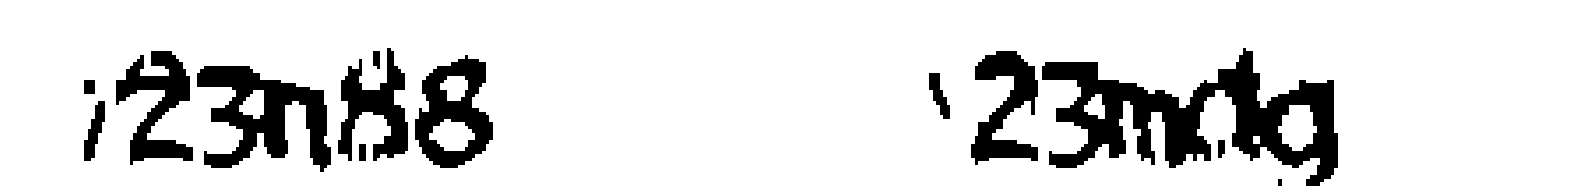

In [ ]:
plot_(gauss_img1, gauss_img2)

cv2.rectangle() untuk menggambar beberapa persegi panjang hitam pada dua gambar (gauss_img1 dan gauss_img2). Setiap persegi panjang digambar dengan koordinat sudut kiri atas dan kanan bawah yang ditentukan, menggunakan warna hitam (0 untuk grayscale), dan dengan ketebalan garis 1.

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
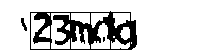

In [ ]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

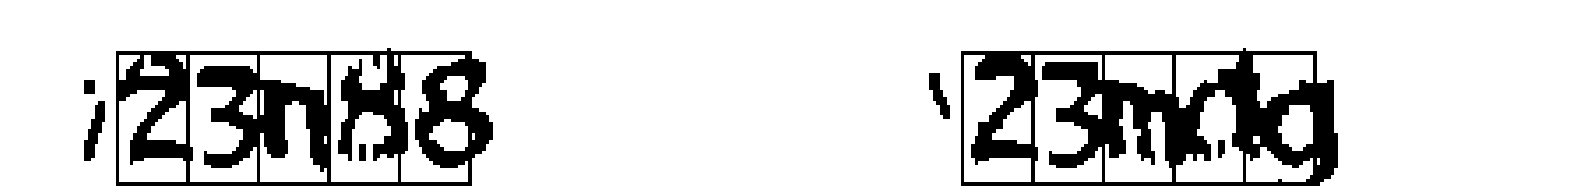

In [ ]:
plot_(gauss_img1, gauss_img2)

In [ ]:
path = '/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/'

In [ ]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [ ]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator


In [ ]:
X = []
y = []

for image in os.listdir(path) :

    if image[6:] != 'png' :
        continue

    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [ ]:
X /= 255.0

[]

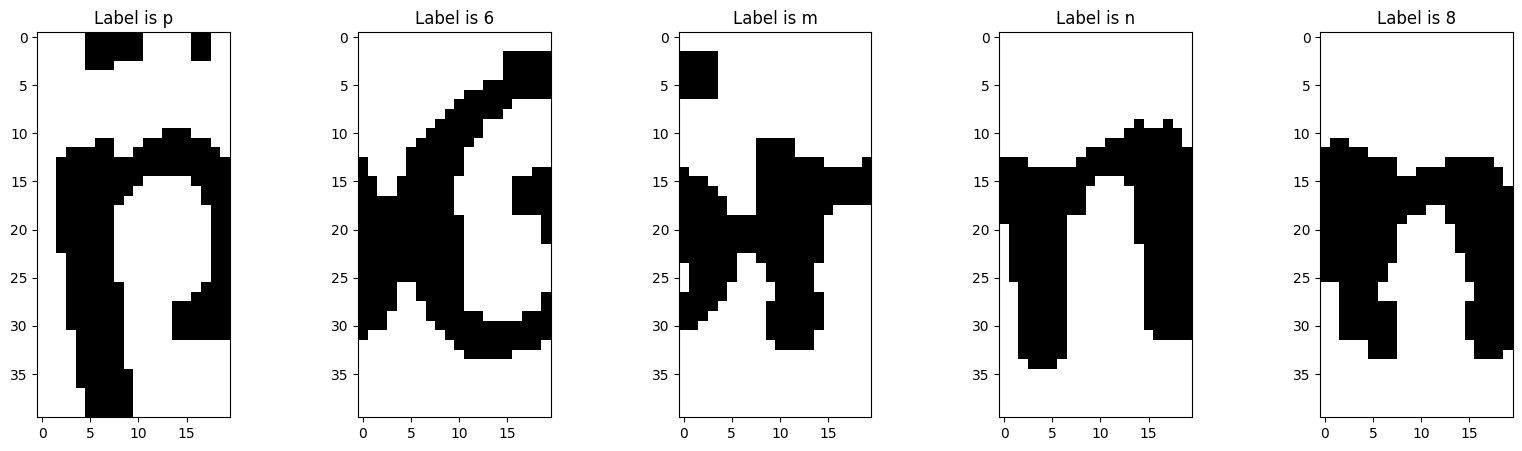

In [ ]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [ ]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of b : 240
Occurance count of 7 : 258
Occurance count of y : 232
Occurance count of 3 : 267
Occurance count of 6 : 259
Occurance count of d : 259
Occurance count of x : 264
Occurance count of c : 262
Occurance count of 8 : 264
Occurance count of 2 : 265
Occurance count of e : 235
Occurance count of m : 275
Occurance count of 5 : 281
Occurance count of p : 253
Occurance count of n : 525
Occurance count of w : 235
Occurance count of f : 271
Occurance count of g : 271
Occurance count of 4 : 284


In [ ]:
temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

<ipython-input-82-c477dcff4fad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

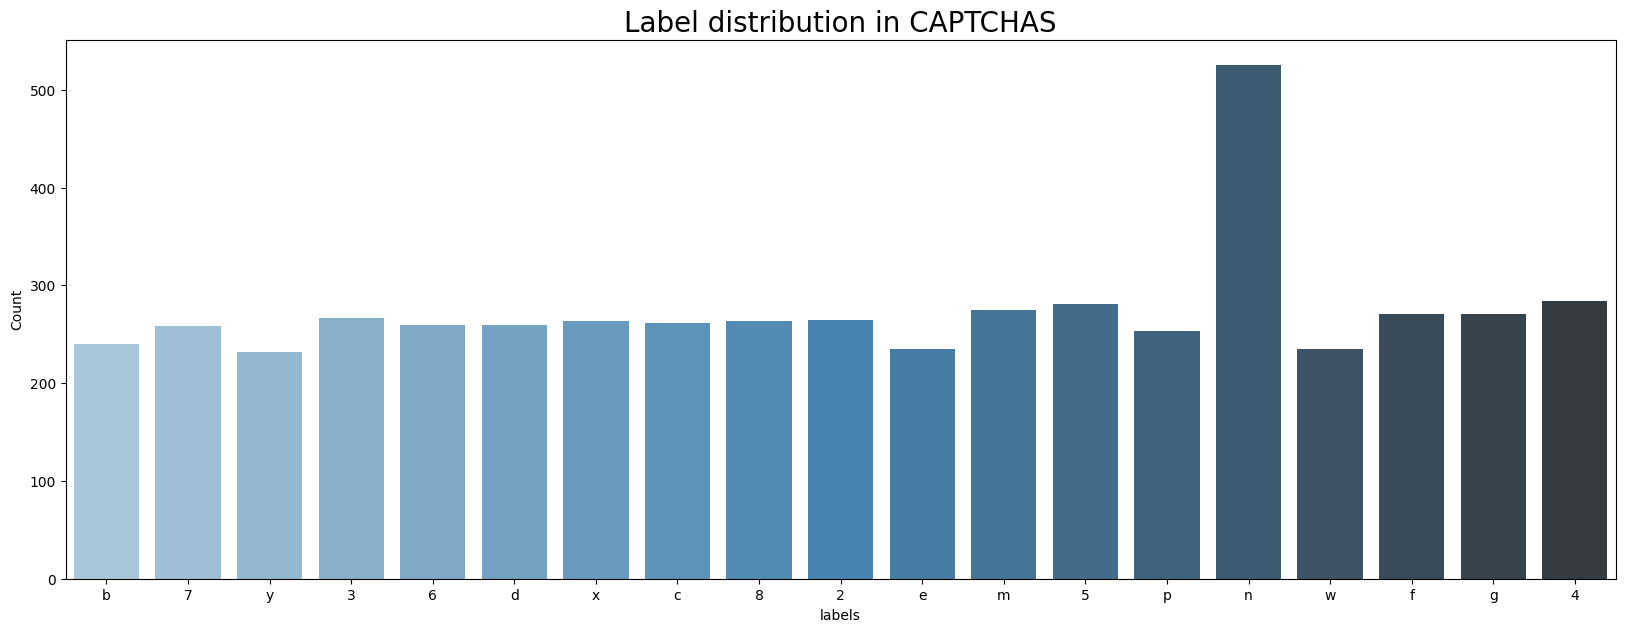

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse_output=False).fit_transform(y_combine.reshape(len(y_combine), 1))

In [ ]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : 6
label : 4
Count : 259


In [ ]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [ ]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [ ]:
y_temp = np.argmax(y_test, axis = 1)

In [ ]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

<ipython-input-92-61f772194c12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in test set')

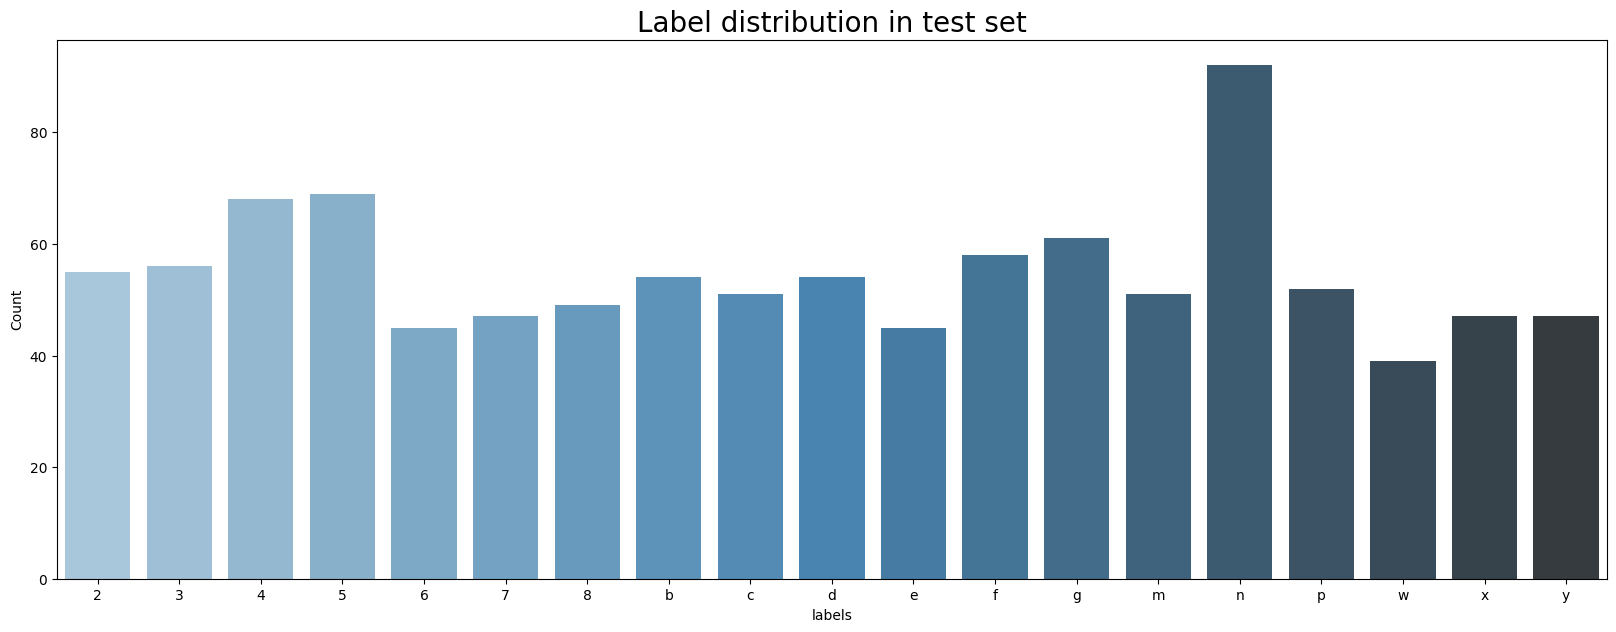

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

####MODEL CREATION


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [ ]:
def conv_layer (filterx) :

    model = Sequential()

    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

    return model

In [ ]:
def dens_layer (hiddenx) :

    model = Sequential()

    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    return model

In [ ]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :

    model = Sequential()
    model.add(Input((40, 20, 1,)))

    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))

    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))

    model.add(Dense(19, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [ ]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8227, 800)
(8227, 19)


In [ ]:
X_train = np.reshape(X_train, (8227, 40, 20, 1))

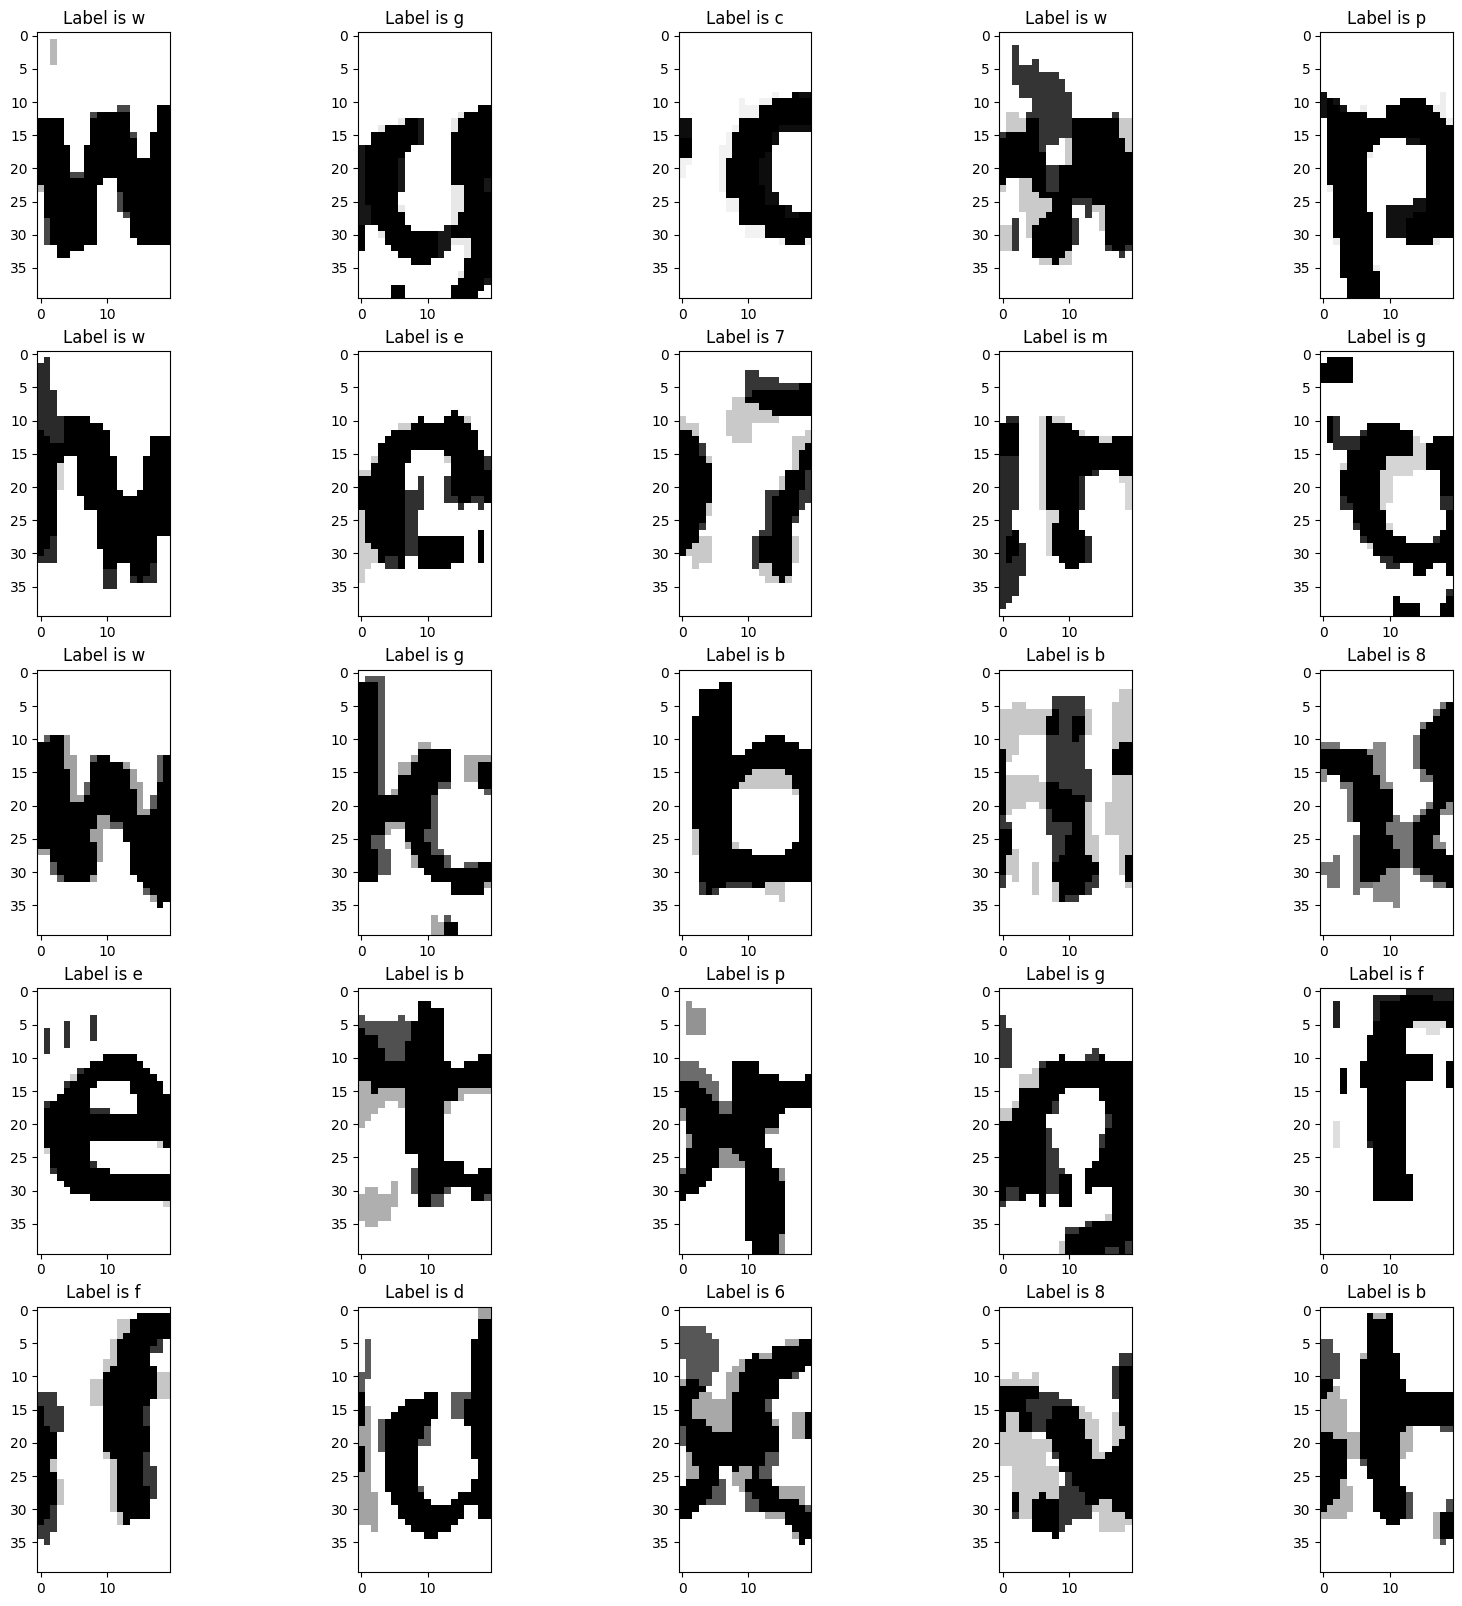

In [ ]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

In [ ]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [ ]:
train_set = traingen.flow(X_train, y_train)

In [ ]:
trainX, trainy = train_set.__next__()


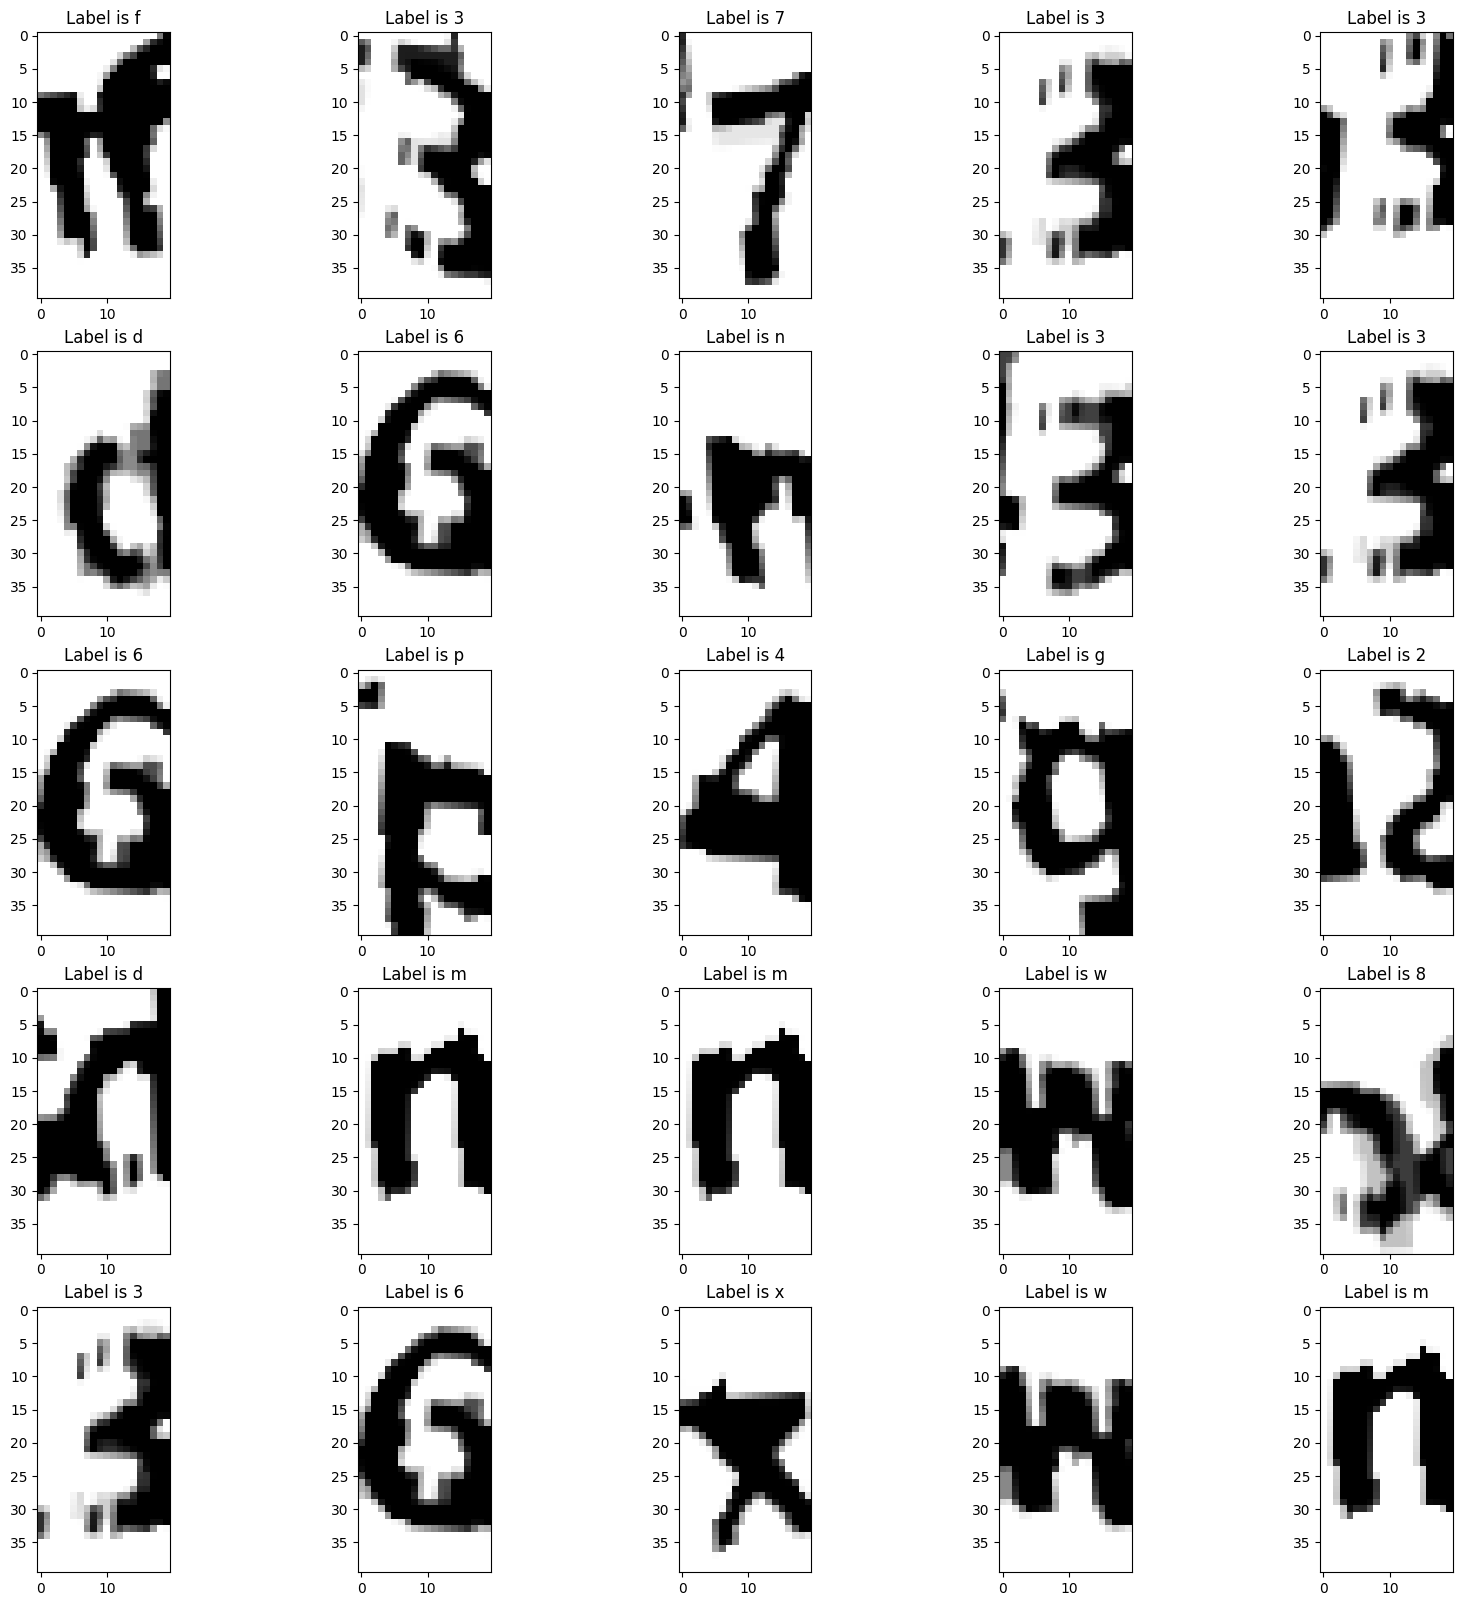

In [ ]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

In [ ]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 20, 10, 128)         │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 10, 5, 32)           │          37,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 5, 3, 16)            │           4,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 32)                  │           7,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 19)                  │             627 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,155 (207.64 KB)

 Trainable params: 52,675 (205.76 KB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkp = ModelCheckpoint('./result_model.keras', monitor='val_loss', verbose=1, save_best_only=True)


In [ ]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8227, 40, 20, 1)
(8227, 19)


In [ ]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 150, steps_per_epoch = int(len(X_train)/32), callbacks = [checkp])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


254/257 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1826 - loss: 2.8672
Epoch 1: val_loss improved from inf to 2.85405, saving model to ./result_model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.1845 - loss: 2.8596 - val_accuracy: 0.0635 - val_loss: 2.8541
Epoch 2/150
  1/257 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4375 - loss: 1.7356
Epoch 2: val_loss improved from 2.85405 to 2.85268, saving model to ./result_model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.4375 - loss: 1.7356 - val_accuracy: 0.0635 - val_loss: 2.8527
Epoch 3/150


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


254/257 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5606 - loss: 1.5594
Epoch 3: val_loss improved from 2.85268 to 1.34120, saving model to ./result_model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5612 - loss: 1.5572 - val_accuracy: 0.6827 - val_loss: 1.3412
Epoch 4/150
  1/257 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7188 - loss: 1.1797
Epoch 4: val_loss improved from 1.34120 to 1.33918, saving model to ./result_model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 1.1797 - val_accuracy: 0.6808 - val_loss: 1.3392
Epoch 5/150
255/257 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6884 - loss: 1.1255
Epoch 5: val_loss improved from 1.33918 to 0.90593, saving model to ./result_model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6885 - loss: 1.1251 - val_accuracy: 0.7452 - val_loss: 0.9059
Epoch 6/150
  1/257 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6250 - loss: 0.9283
Epoch 6: val_loss improved from 0.90593 

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

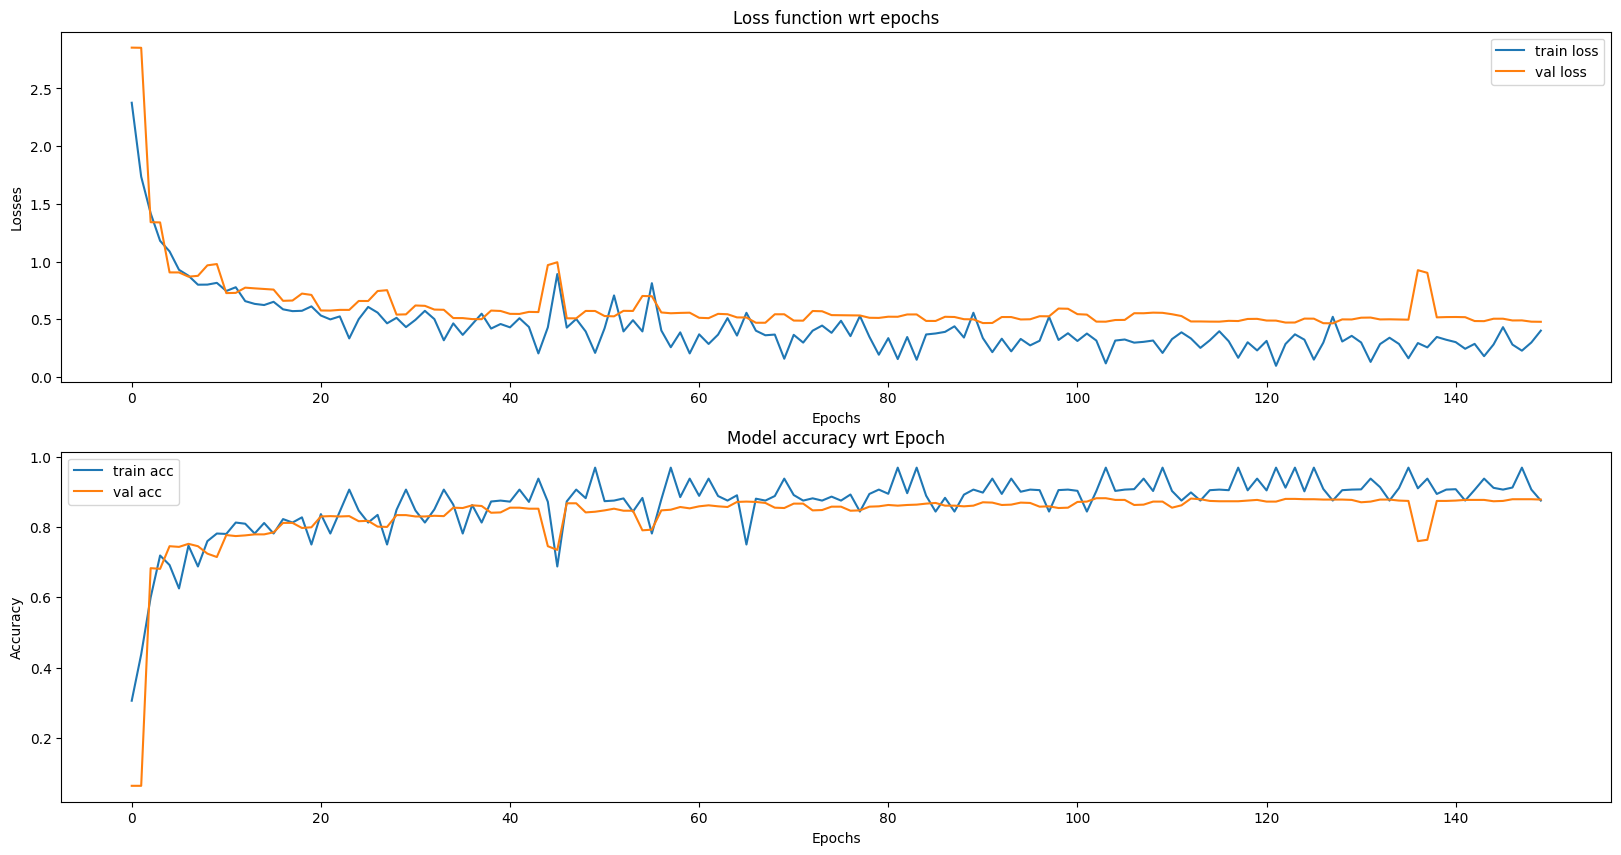

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('./result_model.keras')

In [ ]:
pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [ ]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.8778846153846154
              precision    recall  f1-score   support

           2       0.94      0.93      0.94        55
           3       0.98      0.84      0.90        56
           4       0.87      0.90      0.88        68
           5       0.98      0.93      0.96        69
           6       0.93      0.87      0.90        45
           7       0.89      0.87      0.88        47
           8       0.96      0.94      0.95        49
           b       0.98      0.96      0.97        54
           c       0.77      0.86      0.81        51
           d       0.88      0.83      0.86        54
           e       0.92      0.78      0.84        45
           f       0.87      0.95      0.91        58
           g       0.90      0.92      0.91        61
           m       0.86      0.47      0.61        51
           n       0.70      0.88      0.78        92
           p       0.90      0.90      0.90        52
           w       0.73      0.97      0.84        

In [ ]:
def get_demo (img_path) :

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))

    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0

    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)

    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

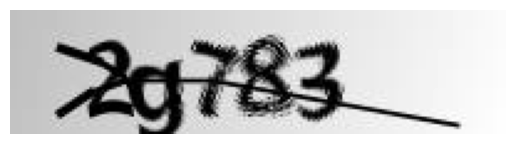

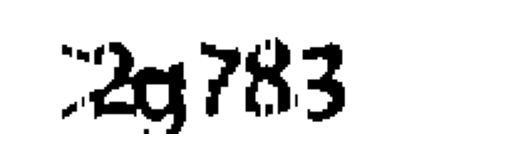

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
2
g
7
8
3
2g783.png


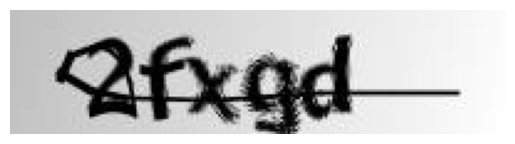

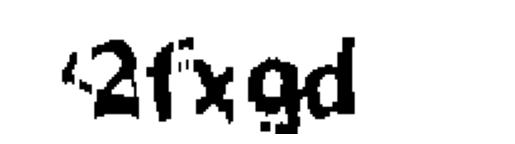

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2
f
x
g
d
2fxgd.png


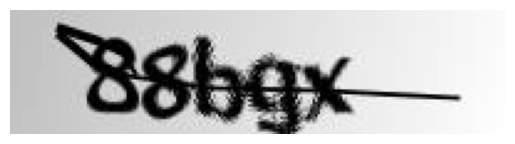

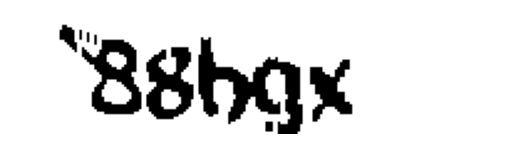

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
8
8
b
g
x
88bgx.png


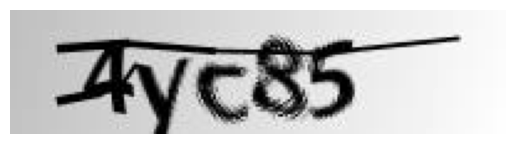

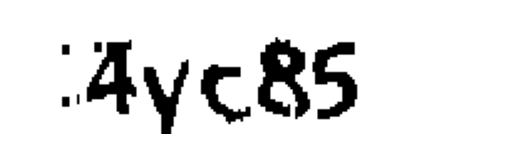

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4
y
c
8
5
4yc85.png


In [ ]:
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/2g783.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/2fxgd.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/88bgx.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/4yc85.png')

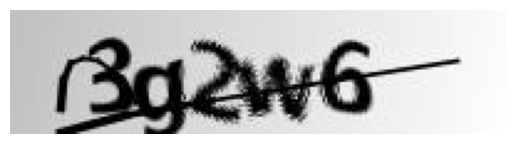

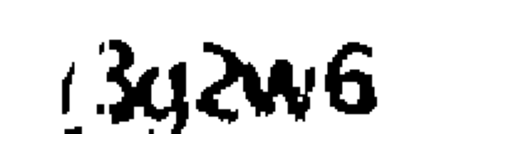

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3
g
2
w
w
3g2w6.png


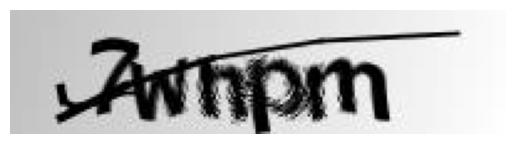

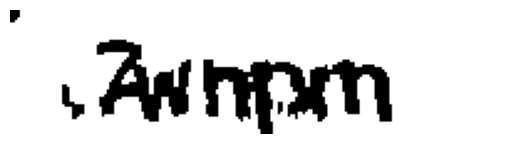

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7
w
n
p
n
7wnpm.png


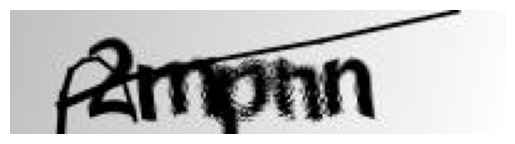

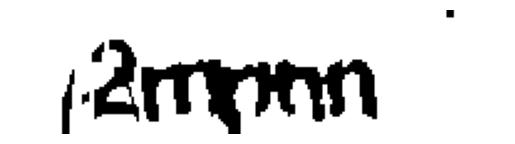

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2
n
y
c
m
2mpnn.png


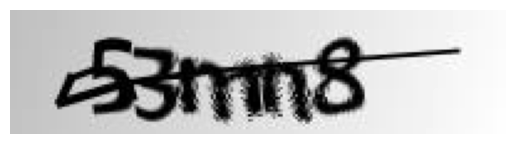

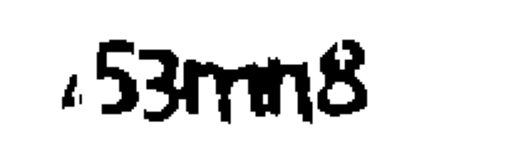

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
5
3
n
n
8
53mn8.png


In [ ]:
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/3g2w6.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/7wnpm.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/2mpnn.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/53mn8.png')